In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Data

The dataset provides patients’ information. It includes 768 records and 10 fields. The classification goal is to predict whether the patient has diabetes (1) or not (0) (variable y)

In [2]:
data = pd.read_csv('diabetes.csv')
print(data.shape)
print(data.columns)

(768, 10)
Index(['ID', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'y'],
      dtype='object')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
ID                          768 non-null int64
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
y                           768 non-null int64
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [4]:
data.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y
0,10001,6,148,72,35,0,33.6,0.627,50,1
1,10002,1,85,66,29,0,26.6,0.351,31,0
2,10003,8,183,64,0,0,23.3,0.672,32,1
3,10004,1,89,66,23,94,28.1,0.167,21,0
4,10005,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y
763,10764,10,101,76,48,180,32.9,0.171,63,0
764,10765,2,122,70,27,0,36.8,0.340,27,0
765,10766,5,121,72,23,112,26.2,0.245,30,0
766,10767,1,126,60,0,0,30.1,0.349,47,1
767,10768,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.describe()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,10384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,10192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,10384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,10576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Input variables

1 - ID: The patient's id on the dataset (numeric)

2 - Pregnancies: Number of times pregnant (numeric)

3 - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (numeric)

4 - BloodPressure: Diastolic blood pressure (mm Hg)  (numeric)

5 - SkinThickness: Triceps skin fold thickness (mm) (numeric)

6 - BMI: Body mass index (weight in kg/(height in m)^2) (numeric)

7 - Insulin: 2-Hour serum insulin (mu U/ml) (numeric)

8 - DiabetesPedigreeFunction: Diabetes pedigree function (numeric)

9 - Age: Age (years)(numeric)

#### Predict variable (desired target):

y - whether or not a patient has diabetes (binary: '1','0')

# Data exploration

In [7]:
data['y'].value_counts()

0    500
1    268
Name: y, dtype: int64

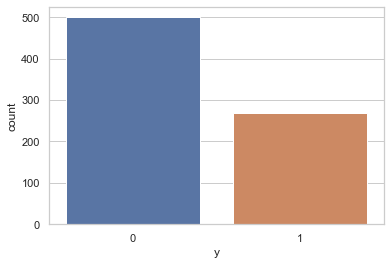

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x='y', data=data)
plt.show()
plt.savefig('diabetes_count_plot')

In [9]:
count_no_diabetic = len(data[data['y']==0])
count_diabetic = len(data[data['y']==1])
pct_of_no_diabetic = count_no_diabetic/(count_no_diabetic+count_diabetic)
print("\033[1m percentage of no diabetic is\033[1m", pct_of_no_diabetic*100)
pct_of_diabetic = count_diabetic/(count_no_diabetic+count_diabetic)
print("\033[1m percentage of ddiabetic\033[1m", pct_of_diabetic*100)

 percentage of no diabetic is 65.10416666666666
 percentage of ddiabetic 34.89583333333333


Our classes are imbalanced, and the ratio of no-diabetic to diabetic instances is 65:35. Before we go ahead to balance the classes, let’s do some more exploration.

In [10]:
data.groupby('y').mean()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
y,,,,,,,,,
0,10391.834000,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,10370.817164,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Observations:

1. The average number of times pregnant among diabetics is higher than of non-diabetics.

2. The average glucose level among diabetics is higher than of non-diabetics.

3. The average blood pressure level among diabetics is higher than of non-diabetics.

4. The average skin thickness level among diabetics is higher than of non-diabetics.

5. The average Insulin level among diabetics is higher than of non-diabetics.

6. The average BM level among diabetics is higher than of non-diabetics

7. The average pedigree function among diabetics is bit higher than of non-diabetics

8. The average age of is higher than of non-diabetics

Our final data columns will be:

In [11]:
df1 = data.copy()
df1.columns.values

array(['ID', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'y'],
      dtype=object)

In [12]:
df1.drop(['ID'], axis=1, inplace=True)

In [13]:
X = df1.loc[:, df1.columns != 'y']
y = df1.loc[:, df1.columns == 'y']

# Over-sampling using SMOTE

With our training data created, I’ll up-sample the diabetic using the __SMOTE algorithm__ (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (diabetic) instead of creating copies.

2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [14]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns1 = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns1)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [15]:
# we can Check the numbers of our data
print("\033[1m length of oversampled data is" ,len(os_data_X))
print("\033[1m Number of no diabetic in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Number of diabetic",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Proportion of no diabetic data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("\033[1m Proportion of diabetic data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

 length of oversampled data is 686
 Number of no diabetic in oversampled data 343
 Number of diabetic 343
 Proportion of no diabetic data in oversampled data is  0.5
 Proportion of diabetic data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination

__Recursive Feature Elimination (RFE)__ is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The RFE has helped us select the following features: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'.

In [17]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 
X=os_data_X[cols]
y=os_data_y['y']

# Implementing the model

In [18]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.628161
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.094     
Dependent Variable:    y                  AIC:                877.8365  
Date:                  2020-05-31 20:09   BIC:                914.0835  
No. Observations:      686                Log-Likelihood:     -430.92   
Df Model:              7                  LL-Null:            -475.50   
Df Residuals:          678                LLR p-value:        1.8391e-16
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.0919   0.0288  3.1870 0

# Random Forest Classifier Model Fitting

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the test set results and calculating the accuracy

In [20]:
y_pred = rf.predict(X_test)
print("\033[1m Accuracy of Random Forest Classifier Model on test set:", '{:.2f}'.format(rf.score(X_test, y_test)))

 Accuracy of Random Forest Classifier Model on test set: 0.80


# Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[78 24]
 [18 86]]


In [22]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  164 correct predictions
 The result is telling us that we have:  42 incorrect predictions
 We have a total predictions of:  206


# Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       102
           1       0.78      0.83      0.80       104

    accuracy                           0.80       206
   macro avg       0.80      0.80      0.80       206
weighted avg       0.80      0.80      0.80       206



In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest Classifier Model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Random Forest Classifier Model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Random \nForest Classifier Model predicted a patient is diabetic, that patient is actually diabetic","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Random Forest Classifier Model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a diabetic in the test set, our Random Forest Classifier\nModel can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Random Forest Classifier Model: 79.61%
Well, you got a classification rate of 79.61%

Precision of Random Forest Classifier Model: 78.18%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Random 
Forest Classifier Model predicted a patient is diabetic, that patient is actually diabetic 78.18% of
 the time.

Recall of Random Forest Classifier Model: 82.69%
Recall: If there is a diabetic in the test set, our Random Forest Classifier
Model can identify it 82.69% of the time.


# ROC Curve

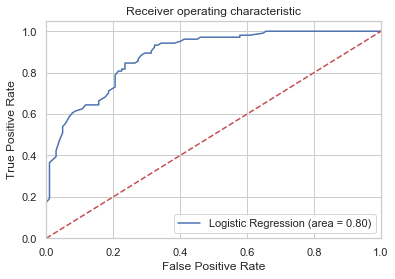

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Feature importance in Random Forest Classifier

Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [26]:
feature_labels = np.array(cols)

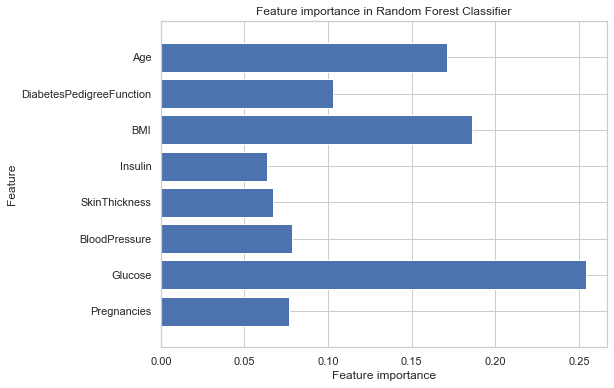

In [27]:
plt.figure(figsize=(8,6))
n_features =len(feature_labels)
plt.barh(range(n_features), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_labels)
plt.title('Feature importance in Random Forest Classifier')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

In [28]:
feature_labels = np.array(cols)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Glucose-25.42%
BMI-18.59%
Age-17.10%
DiabetesPedigreeFunction-10.31%
BloodPressure-7.84%
Pregnancies-7.67%
SkinThickness-6.72%
Insulin-6.34%


# Real-time Prediction

In [29]:
data['Probability to Diabetes'] = rf.predict_proba(data[X_train.columns])[:,1]
data[['ID','Probability to Diabetes']].head(10)

,ID,Probability to Diabetes
0,10001,0.88
1,10002,0.16
2,10003,0.43
3,10004,0.02
4,10005,0.86
5,10006,0.05
6,10007,0.69
7,10008,0.69
8,10009,0.63
9,10010,0.76
